Training time: 287.84 seconds
Test time: 0.25 seconds
              precision    recall  f1-score   support

           0       0.62      0.69      0.65     77676
           1       0.65      0.58      0.61     77614

    accuracy                           0.63    155290
   macro avg       0.64      0.63      0.63    155290
weighted avg       0.64      0.63      0.63    155290



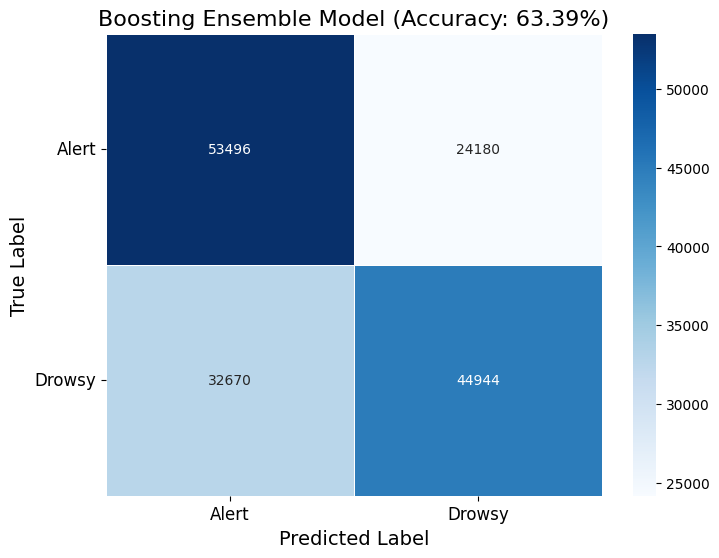

Accuracy: 0.63391074763346
Precision: 0.6501938545223077
Recall: 0.5790707861983663
F1-score: 0.6125747931687769
AUC-ROC: 0.6893965729813782


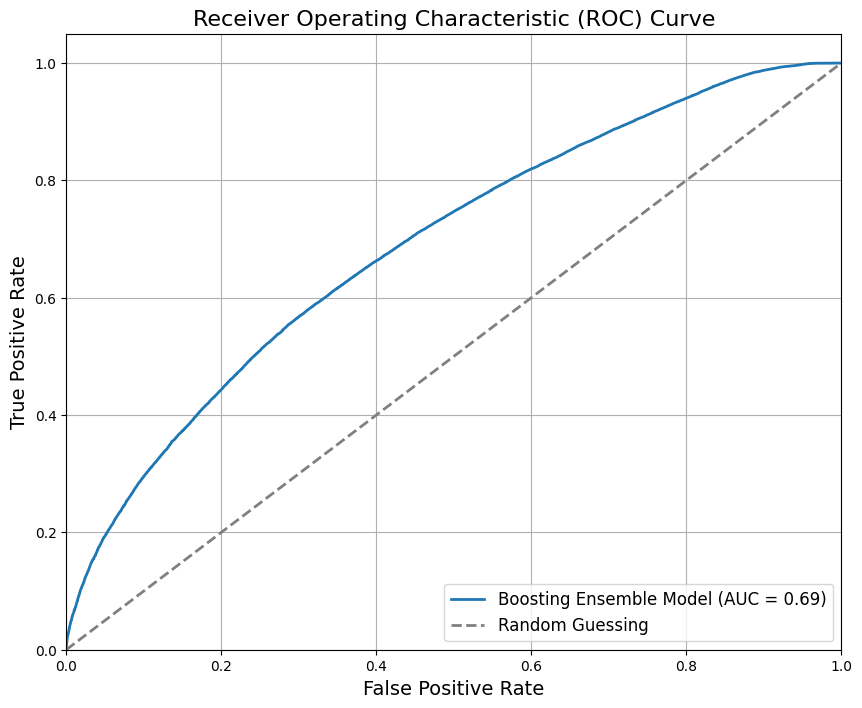

In [1]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from time import time

# Load data
X_train = np.load('../Train Test Dataset - Feature 5/X_train.npy')
X_test = np.load('../Train Test Dataset - Feature 5/X_test.npy')
y_train = np.load('../Train Test Dataset - Feature 5/y_train.npy')
y_test = np.load('../Train Test Dataset - Feature 5/y_test.npy')

# Create and train the Boosting ensemble
start_time = time()
boosting_model = GradientBoostingClassifier(
    n_estimators=100,  # Number of boosting stages
    learning_rate=0.1,  # Step size at each iteration
    max_depth=3,  # Maximum depth of individual estimators
    random_state=42
)
boosting_model.fit(X_train, y_train)
end_time = time()

training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

# Predictions
start_time_test = time()
ensemble_pred_test = boosting_model.predict(X_test)
ensemble_pred_test_proba = boosting_model.predict_proba(X_test)[:, 1]  # Probability for positive class
end_time_test = time()

test_time = end_time_test - start_time_test
print(f"Test time: {test_time:.2f} seconds")

# Classification Report
classification_report_str = classification_report(y_test, ensemble_pred_test)
print(classification_report_str)

# Confusion Matrix
class_labels = ["Alert", "Drowsy"]
conf_matrix = confusion_matrix(y_test, ensemble_pred_test)
accuracy = accuracy_score(y_test, ensemble_pred_test) * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=class_labels, yticklabels=class_labels, linewidths=.5)

plt.title(f'Boosting Ensemble Model (Accuracy: {accuracy:.2f}%)', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

# Evaluation Metrics
accuracy = accuracy_score(y_test, ensemble_pred_test)
precision = precision_score(y_test, ensemble_pred_test)
recall = recall_score(y_test, ensemble_pred_test)
f1 = f1_score(y_test, ensemble_pred_test)
auc_roc = roc_auc_score(y_test, ensemble_pred_test_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)

# ROC Curve
roc_data = {}

fpr, tpr, thresholds = roc_curve(y_test, ensemble_pred_test_proba)
roc_auc = auc(fpr, tpr)
roc_data['Boosting Ensemble Model'] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

# Plotting ROC Curve
plt.figure(figsize=(10, 8))
for name, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], lw=2, label=f'{name} (AUC = {data["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2, label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()
